In [1]:
import pandas as pd
df = pd.read_csv('data/DCOILBRENTEU.csv')

In [2]:
df.head()

,DATE,DCOILBRENTEU
0,2015-06-08,61.33
1,2015-06-09,63.23
2,2015-06-10,64.68
3,2015-06-11,63.76
4,2015-06-12,63.19


In [3]:
df.shape

(1306, 2)

In [4]:
df = df[df.DCOILBRENTEU != '.']
df.shape

(1276, 2)

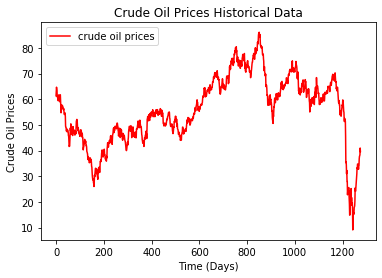

In [5]:
import matplotlib.pyplot as plt
df_plot = df.iloc[:, 1:2].values.astype(float)
plt.plot(df_plot, color = 'red', label = 'crude oil prices')
plt.title('Crude Oil Prices Historical Data')
plt.xlabel('Time (Days)')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

In [6]:
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import load_model

Using TensorFlow backend.
C:\Users\SRAVAN\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SRAVAN\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SRAVAN\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SRAVAN\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [7]:
batch_size = 64
epochs = 120
timesteps = 30

In [8]:
length = len(df)
length

1276

In [9]:
length *= 1 - 0.1
length

1148.4

In [10]:
1148%64

60

In [11]:
def get_train_length(dataset, batch_size, test_percent):
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length)-100, int(length)):
        if x % batch_size == 0:
            train_length_values.append(x)
            print(x)
    return max(train_length_values)

In [12]:
length = get_train_length(df, 64, 0.1)

1088


In [17]:
upper_train = length + (2 * timesteps)
df_train = df[0:upper_train]
training_set = df_train.iloc[:, 1:2].values

In [21]:
training_set.shape

(1148, 1)

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set = sc.fit_transform(np.float64(training_set))
training_set.shape

(1148, 1)

In [23]:
training_set

array([[0.58807859],
       [0.61971362],
       [0.64385614],
       ...,
       [0.64085914],
       [0.61921412],
       [0.61505162]])

In [26]:
x_train = []
y_train = []
print(length + timesteps)
for i in range(timesteps, length+timesteps):
    x_train.append(training_set[i-timesteps: i, 0])
    y_train.append(training_set[i:i+timesteps, 0])

print(len(x_train))
print(len(y_train))

1118
1088
1088


In [29]:
x_train[0:2]

[array([0.58807859, 0.61971362, 0.64385614, 0.62853813, 0.61904762,
        0.58241758, 0.57842158, 0.57842158, 0.58874459, 0.55611056,
        0.57492507, 0.59373959, 0.59307359, 0.56993007, 0.56826507,
        0.54978355, 0.57109557, 0.59340659, 0.59473859, 0.55028305,
        0.51914752, 0.47802198, 0.49433899, 0.52980353, 0.52797203,
        0.52647353, 0.51931402, 0.52164502, 0.52114552, 0.50566101]),
 array([0.61971362, 0.64385614, 0.62853813, 0.61904762, 0.58241758,
        0.57842158, 0.57842158, 0.58874459, 0.55611056, 0.57492507,
        0.59373959, 0.59307359, 0.56993007, 0.56826507, 0.54978355,
        0.57109557, 0.59340659, 0.59473859, 0.55028305, 0.51914752,
        0.47802198, 0.49433899, 0.52980353, 0.52797203, 0.52647353,
        0.51931402, 0.52164502, 0.52114552, 0.50566101, 0.50632701])]

In [30]:
y_train[0]

array([0.50632701, 0.498335  , 0.50532801, 0.495338  , 0.47086247,
       0.46719947, 0.47102897, 0.47818848, 0.47086247, 0.45421245,
       0.39094239, 0.38411588, 0.38344988, 0.36280386, 0.35847486,
       0.37112887, 0.35497835, 0.37096237, 0.36630037, 0.36263736,
       0.36230436, 0.34948385, 0.32867133, 0.32667333, 0.2968698 ,
       0.25940726, 0.26390276, 0.26223776, 0.30719281, 0.36563437])

In [31]:
np.array(x_train).shape

(1088, 30)

In [32]:
np.array(y_train).shape

(1088, 30)

In [33]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

(1088, 30, 1)
(1088, 30, 1)


In [34]:
from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model
import h5py

In [37]:
inputs = Input(batch_shape = (batch_size, timesteps, 1))
lstm1 = LSTM(10, stateful = True, return_sequences = True)(inputs)
lstm2 = LSTM(10, stateful = True, return_sequences = True)(lstm1)
outputs = Dense(units = 1)(lstm2)
regressor = Model(inputs = inputs, outputs = outputs)
regressor.compile(optimizer='adam', loss = 'mae')
regressor.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (64, 30, 1)               0         
_________________________________________________________________
lstm_1 (LSTM)                (64, 30, 10)              480       
_________________________________________________________________
lstm_2 (LSTM)                (64, 30, 10)              840       
_________________________________________________________________
dense_1 (Dense)              (64, 30, 1)               11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [40]:
for i in range(epochs):
    regressor.fit(x_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    regressor.reset_states()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
1088/1088 [==============================] - 2s 2ms/step - loss: 0.4005
Epoch 1/1
1088/1088 [==============================] - 1s 479us/step - loss: 0.1341
Epoch 1/1
1088/1088 [==============================] - 1s 464us/step - loss: 0.1431
Epoch 1/1
1088/1088 [==============================] - 0s 447us/step - loss: 0.1304
Epoch 1/1
1088/1088 [==============================] - 0s 438us/step - loss: 0.1122
Epoch 1/1
1088/1088 [==============================] - 0s 437us/step - loss: 0.1134
Epoch 1/1
1088/1088 [==============================] - 0s 449us/step - loss: 0.1091
Epoch 1/1
1088/1088 [==============================] - 1s 471us/step - loss: 0.1057
Epoch 1/1
1088/1088 [==============================] - 1s 469us/step - loss: 0.1036
Epoch 1/1
1088/1088 [==============================] - 0s 453us/step - loss: 0.1018
Epoch 1/1
1088/1088 [==============================] - 0s 451us/st

1088/1088 [==============================] - 1s 510us/step - loss: 0.0920
Epoch 1/1
1088/1088 [==============================] - 1s 503us/step - loss: 0.0919
Epoch 1/1
1088/1088 [==============================] - 1s 464us/step - loss: 0.0919
Epoch 1/1
1088/1088 [==============================] - 1s 924us/step - loss: 0.0918
Epoch 1/1
1088/1088 [==============================] - 1s 1ms/step - loss: 0.0917
Epoch 1/1
1088/1088 [==============================] - 1s 974us/step - loss: 0.0916
Epoch 1/1
1088/1088 [==============================] - 1s 503us/step - loss: 0.0915
Epoch 1/1
1088/1088 [==============================] - 1s 487us/step - loss: 0.0914
Epoch 1/1
1088/1088 [==============================] - 1s 761us/step - loss: 0.0914
Epoch 1/1
1088/1088 [==============================] - 1s 1ms/step - loss: 0.0913
Epoch 1/1
1088/1088 [==============================] - 1s 1ms/step - loss: 0.0912
Epoch 1/1
1088/1088 [==============================] - 1s 982us/step - loss: 0.0911
Epoch 1/

In [44]:
import h5py
regressor.save(filepath = "my_model_with_mae_30.h5")

In [45]:
regressor1 = load_model(filepath = "my_model_with_mae_30.h5")
regressor1

In [46]:
regressor1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (64, 30, 1)               0         
_________________________________________________________________
lstm_1 (LSTM)                (64, 30, 10)              480       
_________________________________________________________________
lstm_2 (LSTM)                (64, 30, 10)              840       
_________________________________________________________________
dense_1 (Dense)              (64, 30, 1)               11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________
